In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline

In [35]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [38]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [40]:
# creating a crosstab
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_proportion = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_proportion['proportion'] = crosstab_proportion.iloc[:,1] / (crosstab_proportion.iloc[:,1] + crosstab_proportion.iloc[:,0]) * 100
crosstab_proportion = crosstab_proportion.sort_values('proportion', ascending=False).head(10)
crosstab_proportion
# there are categories like Grocery, Smart Home Security & Lighting, Health & Personal Care with more than 6% being bestsellers

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
"Billiard, Snooker & Pool",241,8,3.212851
Pet Supplies,9152,285,3.020028
Home Brewing & Wine Making,239,7,2.845528
Wind Instruments,243,7,2.800000


In [41]:
# chi-scquare test

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value of 0, we reject the null hypothesis. This implies that there's a significant association between category and isBestSeller in the dataset.

In [45]:
# cramérs-v test

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab, method="cramer")

0.1222829439760564

The fairly low value of 0,122 suggests a weak association between the 2 variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

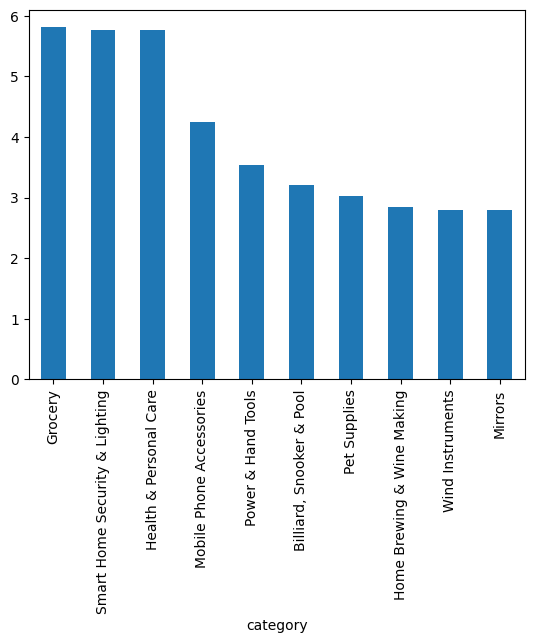

In [48]:
# Plotting a stacked bar chart for the 'crosstab' data
crosstab_proportion['proportion'].plot(kind="bar")
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [51]:
def tukeys_test_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    data_without_outliers = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return data_without_outliers

In [53]:
df_wo_outliers = tukeys_test_outliers(df, 'price')
#df_wo_outliers.groupby('category')['price'].agg('count')

top_categories = df_wo_outliers['category'].value_counts().nlargest(20).index
top_categories_wo_outliers = df_wo_outliers[df_wo_outliers['category'].isin(top_categories)]
top_categories_wo_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


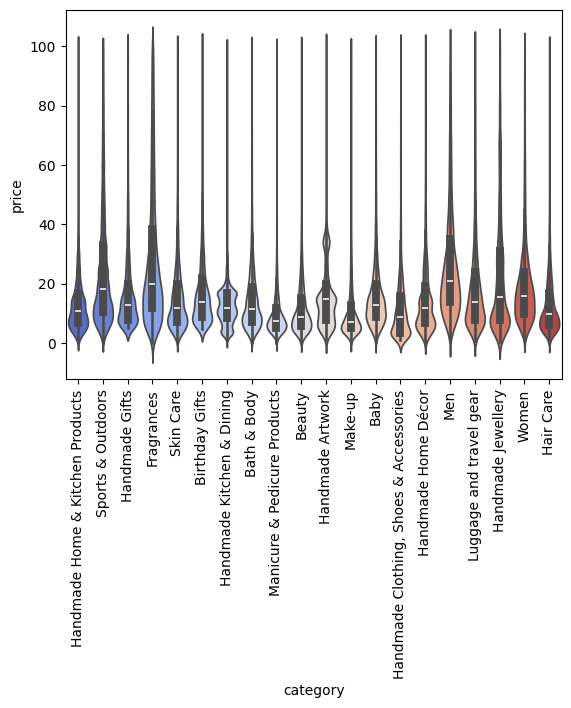

In [55]:
sns.violinplot(data=top_categories_wo_outliers, x='category', y='price', palette="coolwarm", hue='category', legend=False)
plt.xticks(rotation=90)
plt.show()

In [56]:
top_categories_wo_outliers = top_categories_wo_outliers[top_categories_wo_outliers['stars'] != 0]

In [59]:
df_sorted = df_wo_outliers.groupby('category')['price'].agg('mean')
df_sorted.sort_values(ascending=False)

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

The category Motherboards tend to have the highest mean in the IQR. 

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


In [221]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214869

In [223]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea' 
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.13316425462433937

Why have a slightly negative correlation between price and stars. Tendency to be no correlation as it is near 0. 
It shows that if one value increases, the other one decreases. 

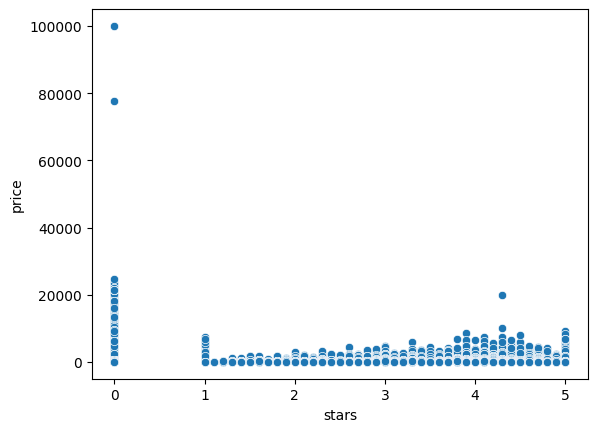

In [226]:
# Plotting a scatter plot to visualize the relationship between 'stars' and 'price'
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

In [230]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

# Calculating the Spearman correlation coefficients between 'SalePrice' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df['price'], method='spearman')

# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

price                1.000000
uid                 -0.008249
stars               -0.133164
reviews             -0.148690
boughtInLastMonth   -0.198937
dtype: float64